## 선형회귀(linear regression)
### kNN regression의 문제점
- 새로운 샘플이 훈련값 범위를 벗어나면 잘못된 예측을 함


In [2]:
import	numpy as np
import matplotlib.pyplot as plt
perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])
perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])

In [3]:
from	sklearn.model_selection import	train_test_split
#	훈련 세트와 테스트 세트로 나눔
train_input,	test_input,	train_target,	test_target =	train_test_split(
perch_length,	perch_weight,	random_state=42)
#	훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input =	train_input.reshape(-1,	1)
test_input =	test_input.reshape(-1,	1)
from	sklearn.neighbors import	KNeighborsRegressor
knr =	KNeighborsRegressor(n_neighbors=3)
#	k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input,	train_target)
print('50cm:',	knr.predict([[50]]))
print('100cm:',	knr.predict([[100]]))

# 50cm, 100cm의 weight가 동일하게 예측됨 -> 문제가 있다

50cm: [1033.33333333]
100cm: [1033.33333333]


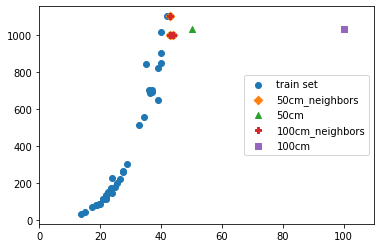

In [4]:
# 50cm 농어의 이웃을 구함
distances_50,	indexes_50	=	knr.kneighbors([[50]])
# 100cm	농어의 이웃을 구함
distances_100,	indexes_100	=	knr.kneighbors([[100]])
# 훈련 세트의 산점도
plt.scatter(train_input,	train_target,	label='train set')

# 훈련 세트 중에서 50cm	농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50],	train_target[indexes_50],
marker='D',	label='50cm_neighbors')
# 50cm 농어 데이터
plt.scatter(50,	1033,	marker='^',	label='50cm')

# 훈련 세트 중에서 100cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_100],	train_target[indexes_100],
marker='P',	label='100cm_neighbors')
# 100cm 농어 데이터
plt.scatter(100,	1033,	marker='s',	label='100cm')
plt.xlim(0,	110)
plt.legend(loc=5)
plt.show()

- 50cm 농어와 100cm 농어의 이웃이 겹침을 확인할 수 있다. -> knn회귀 대신 선형회귀로 해결하자
### 선형회귀
- 데이터를 가장 잘 표현할 수 있는 직선 방정식을 찾는 알고리즘
- LinearRegression 클래스 사용
    - fit(), score(), predict() 사용
    - sklearn.linear_model 패키지

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(f'예측: {lr.predict([[50]])}')

# 기울기 : coef_, 절편 : intercept_
print(lr.coef_, lr.intercept_)

예측: [1241.83860323]
[39.01714496] -709.0186449535474


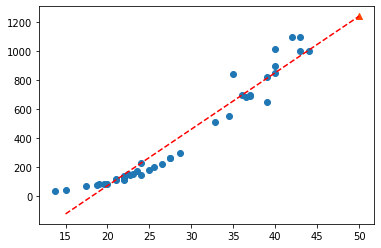

In [11]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)

plt.plot([15, 50],	[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
color='red', linestyle='--')

plt.scatter(50, 1241.8, marker='^', color='orangered')

plt.show()

In [12]:
from cgi import test


print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 전체적으로 underfitting <- 훈련 세트와 테스트 세트 모두 낮음

0.9398463339976041
0.824750312331356


### 다항 회귀
- 일차방정식으로 표현하기 어려움
- 무게가 0 이하일 가능성 발생

In [13]:
# 훈련 세트에 데이터 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


In [15]:
# 다항 회귀식 구하기
lr =LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))
print(lr.coef_, lr.intercept_)

# ax^2 + bx + c

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


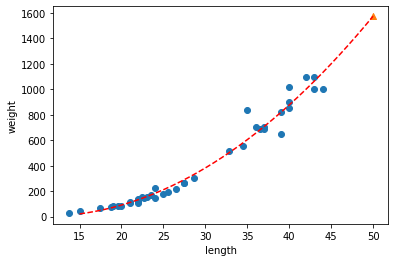

In [19]:
#	구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듬
point=	np.arange(15, 51)
#	훈련 세트의 산점도 그리기
plt.scatter(train_input,	train_target)
#	15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point,	lr.coef_[0]*point**2	+lr.coef_[1]*point	+	lr.intercept_,
color='red',	linestyle='--')
#	50cm	농어 데이터(무게:1574g)
plt.scatter([50],	[1574],	marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_poly,	train_target))
print(lr.score(test_poly,	test_target))

# underfitting이 다소 남아있음

0.9706807451768623
0.9775935108325122


### 특성 공학과 규제
#### 다중회귀
- 여러 특성을 사용한 선형 회귀
- 길이, 높이, 두께 사용
- 다양한 특성의 조합을 생성
- PolynomialFeatures 클래스 사용

#### 특성공학
- 기존의 특성을 사용해서 새로운 특성을 뽑아내는 작업

In [22]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [23]:
import numpy as np

perch_weight = np.array(
[5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,
130.0,	150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,
197.0,	218.0,	300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,
514.0,	556.0,	840.0,	685.0,	700.0,	700.0,	690.0,	900.0,	650.0,
820.0,	850.0,	900.0,	1015.0,	820.0,	1100.0,	1000.0,	1100.0,
1000.0,	1000.0])

In [24]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

### 사이킷런의 변환기(transformer)
- 다항 특성 만들기
    - PolynomialFeatures 클래스 사용
        - 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가
    - PolynomialFeatures(include_bias = True)
        - True: bias(절편,0차항) 추가
        - False: bias 삭제
    - fit([a,b]) : 특성 조합을 찾음
        - [1,a,b,a*b, a^2, b^2]  추가
    - transform([[a,b]]) : 특성 조합을 실제 데이터로 변환
    

In [25]:
# PolynomialFeatures 간단 예제

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [26]:
poly	=	PolynomialFeatures(include_bias=False) #	include_bias=False:	1	제거
poly.fit([[2,	3]])
print(poly.transform([[2,	3]]))

[[2. 3. 4. 6. 9.]]


### 다항 특성 만들기

In [33]:
from re import T
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly[0:3])
print(train_poly.shape)

test_poly = poly.transform(test_input)  # test는 fit함수 호출을 안함

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)


- get_feature_names_out() : 각 특성의 조합을 알려줌

In [29]:
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


### 다중 회귀 모델 훈련 
- 선형 회귀 모델 훈련 과 동일 (여러개의 특성을 사용할 뿐임)
- 특성이 늘어나면 선형 회귀의 정확도 증가

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594199


### 다중 회귀 모델 훈련 2
- degree 증가 -> 고차항의 최대 차수 지정

In [31]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [32]:
#	선형 회귀 모델 훈련 및 훈련 세트 점수 계산

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 훈련 세트에서 overfitting(과대적합) 발생

0.9999999999997439
-144.40564427629454


## 규제
- 모델이 훈련 세트에서 overfitting 되는 것을 방지
- 선형 회귀 모델: 특성에 곱해지는 계수의 크기를 작게 줄임
- L1 규제 -> 어떤 가중치는 0이 됨
- L2 규제 -> 가중치를 0에 가깝게 만듦

- 규제 전에 __표준화__ 과정이 필요
    - StandardScaler 클래스 사용
        - $ Z = \frac{x-\mu}{\sigma}$
    - MinMaxScaler 클래스 사용
        - $ X = \frac{x-x_{min}}{x_{max}- x_{min}}$